# **<font color='crimson'>«Сбор информации об операционной системе удаленного сервера»</font>**

---

**Выполнил**: Юмаев Егор

---

## <font color='green'>**ПОСТАНОВКА ЗАДАЧИ**</font>

---

**Цель**: с помощью протокола SSH подключиться к удаленному серверу и собрать информацию об операционной системе сервера.

**Задачи**:

- подключиться по протоколу **SSH** к удаленному серверу;

- на удаленном сервере создать bash-скрипт, собирающий сведения об операционной системе: версия дистрибутива, версия ядра, количество ядер процессора, объем оперативной памяти, IP-адрес, значение переменной **$CITY**;

- запустить bash-скрипт; записать собранную об операционной системе информацию в файл;

- с помощью утилиты **scp** скопировать собранную информацию с удаленного сервера на локальную машину.

В качестве локальной машины использована развернутая в VirtualBox виртуальная машина с операционной системой Astra Linux.


## <font color='green'>**Сбор информации на удаленном сервере**</font>

---

Подключаемся по протоколу ssh к удаленному серверу.

In [ ]:
```bash
ssh -p 2222 user@***.***.***.**
```

Проверим, какая операционная система установлена на удаленном сервере.

In [ ]:
```bash
lsb_release -a
```

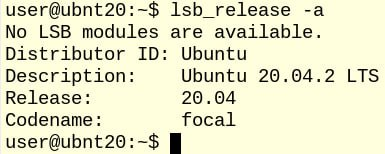

На удаленном сервере установлена Ubuntu 20.04.2 LTS.

На удаленном сервере в домашней папке создаем папку для сохранения результатов. Переходим в домашнюю папку и проверяем путь до этой папки на сервере


In [ ]:
```bash
cd ~
pwd
```

Получен следующий путь до домашней папки на сервере:

/tmp/guest-iNgbLrmd

Создаем папку для сохранения результатов и переходим в нее.

In [ ]:
```bash
mkdir os_info
cd os_info
```

В папке ey создаем bash-скрипт reader.sh в соответствии с техзаданием.

Убедимся, что на удаленном сервере задана переменная $CITY и указанной переменной присвоено значение.

In [ ]:
```bash
echo $CITY
```

Переменная существует, ей присвоено значение:

Tomsk/Russia


Открываем редактор nano для создания bash-скрипта.

In [ ]:
```bash
nano reader.sh
```

Подготовим bash-скрипт reader.sh.

In [ ]:
```bash
#!/bin/bash

# каждую позицию собираемых сведений сохраним в отдельную переменную
LINUX_DISTR=$(cat /etc/os-release | grep PRETTY_NAME)
LINUX_CORE=$(lsb_release -r)
CORES_NUMBER=$(nproc)
RAM=$(cat /proc/meminfo | grep MemTotal)
IP_ADDRESS=$(hostname -i)

#выведем на экран собранные об операционной системе сведения
echo " "
echo "Сведения о дистрибутиве: "
echo $LINUX_DISTR
echo " "
echo "Сведения о версии ядра: "
echo $LINUX_CORE
echo " "
echo "Сведения о количестве ядер процессора: "
echo $CORES_NUMBER
echo " "
echo "Сведения об объеме оперативной памяти: "
echo $RAM
echo " "
echo "Сведения об IP-адресе: "
echo $IP_ADDRESS
echo " "

# записываем собранную информацию в файл report.txt
echo " " > report.txt
echo "Сведения о дистрибутиве: " >> report.txt
echo $LINUX_DISTR >> report.txt
echo " " >> report.txt
echo "Сведения о версии ядра: " >> report.txt
echo $LINUX_CORE >> report.txt
echo " " >> report.txt
echo "Сведения о количестве ядер процессора: " >> report.txt
echo $CORES_NUMBER >> eport.txt
echo " " >> report.txt
echo "Сведения об объеме оперативной памяти: " >> report.txt
echo $RAM >>report.txt
echo " " >>report.txt
echo "Сведения об IP-адресе: " >> report.txt
echo $IP_ADDRESS >> report.txt
echo " " >> report.txt
```

Зададим файлу reader.sh права для пользователя на исполнение.

In [ ]:
```bash
chmod 764 reader.sh
```

Исполним файл reader.sh.

In [ ]:
```bash
./reader.sh
```

После выполнение скрипта reader.sh в папке
/tmp/guest-iNgbLrmd/os_info появился файл report.txt. В конец этого файла запишем содержимое переменной $CITY.


In [ ]:
```bash
echo "Содержимое переменной \$CITY: " >> report.txt
echo $CITY >> report.txt
echo " " >> report.txt
```

Выводим на экран содержимое файла report.txt, сформированного в результате запуска bas-скрипта reader.sh.

In [ ]:
```bash
cat report.txt
```

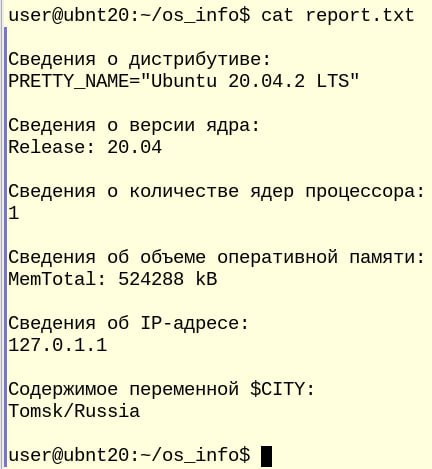

Перейдем в домашнюю директорию пользователя на удаленном сервере и создадим сжатый архивный файл с материалами каталога os_info.

In [ ]:
```bash
cd ..
tar -czvf os_info.tar.gz os_info
```

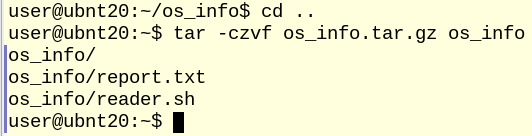

Закрываем сессию с удаленным сервером.

In [ ]:
```bash
exit
```

Копируем сжатый архив script_result.tar.gz с удаленного сервера на локальную виртуальную машину.

In [ ]:
```bash
scp -P 2222 user@***.***.***.**:/tmp/guest-iNgbLrmd/os_info.tar.gz /home/sa/
```

Дополнительно скопируем с удаленного сервера на локальный созданные на удаленном сервере скрипт reader.sh и файл с информацией о системе report.txt.

In [ ]:
```bash
scp -P 2222 user@***.***.***.**:/tmp/guest-iNgbLrmd/os_info/reader.sh /home/sa/
scp -P 2222 user@***.***.***.**:/tmp/guest-iNgbLrmd/os_info/report.txt.sh /home/sa/
```

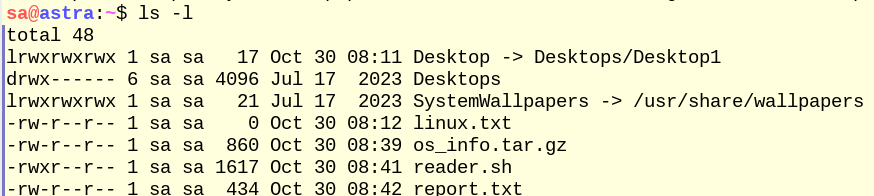

## <font color='mediumblue'>**ВЫВОДЫ**</font>

---

* С помощью протокола **SSH** реализовано подключение к удаленному серверу.

* Для сбора сведений об операционной системе удаленного сервера сформирован bash-скрипт.

* Получены следующие характеристики операционной системы удаленного сервера:

 – Ubuntu 20.04.2 LTS

 – Версия ядра: 20.04

 – Количество ядер процессора: 1

 – Объем оперативной памяти: 524 Mb

 – IP-адрес: 127.0.1.1

 – Переменная $CITY: Tomsk/Russia

* С помощью утилиты **scp** отчет с информацией об операционной системе скопирован с удаленного сервера на локальную машину.
